## Loading data and preliminary analysis

In [ ]:
# Install dependencies

%pip install -r 'requirements.txt'
!pip install tensorflow==2.13.0


import nltk

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# Set paths

path_to_csv = 'Happiness.csv'

In [ ]:
import re
import random
import pandas as pd
import numpy as np
from tensorflow.keras.utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [ ]:
data = pd.read_csv(path_to_csv, encoding='ISO-8859-1')


In [ ]:
data.head()

,Questions,Answer
0,Why is so much emphasis laid on Happiness as a...,Attaining happiness has been the most common h...
1,"We are looking for happiness, as you said. But...",The channels through which most of us look for...
2,Happiness derived out of these means is limite...,"It is. In fact, we really need to check if any..."
3,It is momentarylike a child who breaks one to...,"By itself, happiness should be a permanent and..."
4,How can one be happy without desires and depen...,Thats probably one of the oldest belief syste...


In [ ]:
# data preprocessing

for i in range(data.shape[0]):
  data['Answer'][i]=re.sub(r'\n', ' ',data['Answer'][i])
  data['Answer'][i]=re.sub('\(', '',data['Answer'][i])
  data['Answer'][i]=re.sub(r'\)', '',data['Answer'][i])
  data['Answer'][i]=re.sub(r',', '',data['Answer'][i])
  data['Answer'][i]=re.sub(r'-', '',data['Answer'][i])
  data['Answer'][i]=re.sub(r'/', '',data['Answer'][i])
  data['Answer'][i]=re.sub(r'/', '',data['Answer'][i])

In [ ]:
pairs=[]

for i in range(data.shape[0]):
  pairs.append(((data['Questions'][i]),data['Answer'][i]))

In [ ]:
pairs                                     # questions

[('Why is so much emphasis laid on Happiness as a topic?',
  'Attaining happiness has been the most common human pursuit as we build our lives. In who we are what we do where we go how we perform\x97the bottom line has been to seek and experience happiness. Discussing it as a topic helps us to understand the emotion in its entirety so as to create real and lasting happiness.'),
 ('We are looking for happiness, as you said. But what is it through which we are looking for it?',
  'The channels through which most of us look for happiness is interesting. It ranges from position possessions property relationships health and so on. Today if you ask someone what they want in life they say success. But they want success essentially because they believe it makes them happy. Likewise ask them why they own or purchase material comfort and the most likely response is that it makes them or their family happy. And the biggest reason people get into relationships today is to get that sense of happine

## Data preprocessing

In [ ]:
input_docs = []
target_docs = []
input_tokens = set()
target_tokens = set()

for line in pairs:

  input_doc, target_doc = line[0], line[1]

  # Appending each input sentence to input_docs
  input_docs.append(input_doc)

  # Splitting words from punctuation
  target_doc = " ".join(re.findall(r"[\w']+|[^\s\w]", target_doc))

  # Redefine target_doc below and append it to target_docs
  target_doc = '<START> ' + target_doc + ' <END>'

  target_docs.append(target_doc)

  for token in re.findall(r"[\w']+|[^\s\w]", input_doc):
    if token not in input_tokens:
      input_tokens.add(token)
  for token in target_doc.split():
    if token not in target_tokens:
      target_tokens.add(token)

input_tokens = sorted(list(input_tokens))  # contains all words of input_docs
target_tokens = sorted(list(target_tokens))
num_encoder_tokens = len(input_tokens)
num_decoder_tokens = len(target_tokens)

In [ ]:
input_docs

['Why is so much emphasis laid on Happiness as a topic?',
 'We are looking for happiness, as you said. But what is it through which we are looking for it?',
 'Happiness derived out of these means is limited, isn\x92t it?',
 'It is momentary\x97like a child who breaks one toy and then wants another toy, and then yet another. What are we looking for? If we are looking for happiness, shouldn\x92t it be permanent?',
 'How can one be happy without desires and dependencies?',
 'Can you share the meaning of happiness and explain how to experience it without any dependency?',
 'But what is wrong in this? Isn\x92t this natural?',
 'I certainly will be happy if I buy a new car.',
 'No, I cannot be.',
 'Are happiness and comfort two different things?',
 'Is this a wrong belief that we have?',
 'Parents buy things for children or take them out often, believing it makes the child happy.',
 'In the context of the car, the comfort is also not felt when there is a phone call about something unpleasant

In [ ]:
target_docs

['<START> Attaining happiness has been the most common human pursuit as we build our lives . In who we are what we do where we go how we perform \x97 the bottom line has been to seek and experience happiness . Discussing it as a topic helps us to understand the emotion in its entirety so as to create real and lasting happiness . <END>',
 '<START> The channels through which most of us look for happiness is interesting . It ranges from position possessions property relationships health and so on . Today if you ask someone what they want in life they say success . But they want success essentially because they believe it makes them happy . Likewise ask them why they own or purchase material comfort and the most likely response is that it makes them or their family happy . And the biggest reason people get into relationships today is to get that sense of happiness from the other person . So finally everyone is looking for just that one feeling \x97 happiness . <END>',
 '<START> It is . In 

In [ ]:
input_features_dict = dict([(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict([(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict((i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict((i, token) for token, i in target_features_dict.items())

In [ ]:
input_features_dict

{'!': 0,
 '%': 1,
 '(': 2,
 ')': 3,
 ',': 4,
 '-': 5,
 '.': 6,
 '000': 7,
 '10': 8,
 '15': 9,
 '2': 10,
 '20': 11,
 '24': 12,
 '24x7': 13,
 '30': 14,
 '4': 15,
 '5': 16,
 '50': 17,
 '7': 18,
 '80': 19,
 '90': 20,
 ':': 21,
 ';': 22,
 '?': 23,
 'A': 24,
 'After': 25,
 'Also': 26,
 'Am': 27,
 'And': 28,
 'Another': 29,
 'Are': 30,
 'As': 31,
 'Basically': 32,
 'Because': 33,
 'Becomes': 34,
 'Being': 35,
 'Between': 36,
 'Brahma': 37,
 'But': 38,
 'By': 39,
 'Can': 40,
 'Children': 41,
 'Could': 42,
 'Did': 43,
 'Do': 44,
 'Does': 45,
 'Doing': 46,
 'Don': 47,
 'EQ': 48,
 'Earlier': 49,
 'Easier': 50,
 'Either': 51,
 'Emphasis': 52,
 'Even': 53,
 'Every': 54,
 'Everybody': 55,
 'Everything': 56,
 'For': 57,
 'God': 58,
 'Guru': 59,
 'Happiness': 60,
 'He': 61,
 'How': 62,
 'Human': 63,
 'I': 64,
 'IQ': 65,
 'If': 66,
 'In': 67,
 'Internally': 68,
 'Is': 69,
 'Isn': 70,
 'It': 71,
 'Just': 72,
 'Kumar': 73,
 'Leo': 74,
 'Let': 75,
 'Many': 76,
 'May': 77,
 'Maybe': 78,
 'Method': 79,
 'Mo

## Encoder - Decoder model

In [ ]:
max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in input_docs])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in target_docs])

encoder_input_data = np.zeros(
    (len(input_docs), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
for line, (input_doc, target_doc) in enumerate(zip(input_docs, target_docs)):
    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
        #Assign 1. for the current line, timestep, & word in encoder_input_data
        encoder_input_data[line, timestep, input_features_dict[token]] = 1.

    for timestep, token in enumerate(target_doc.split()):
        decoder_input_data[line, timestep, target_features_dict[token]] = 1.
        if timestep > 0:
            decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1.

In [ ]:
encoder_input_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
decoder_target_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Training

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

dimensionality = 256  # Dimensionality
batch_size = 10       # Batch size
epochs = 500          # Number of epochs

# Placeholder values for number of tokens (replace with actual values)
num_encoder_tokens = 100  # Example size for encoder token set
num_decoder_tokens = 100  # Example size for decoder token set

# Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_lstm = LSTM(dimensionality, return_state=True)
encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_inputs)
encoder_states = [state_hidden, state_cell]

# Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs) # Compiling

In [ ]:
training_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, 100)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None, 100)]          0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 256),                365568    ['input_1[0][0]']             
                              (None, 256),                                                        
                              (None, 256)]                                                        
                                                                                            

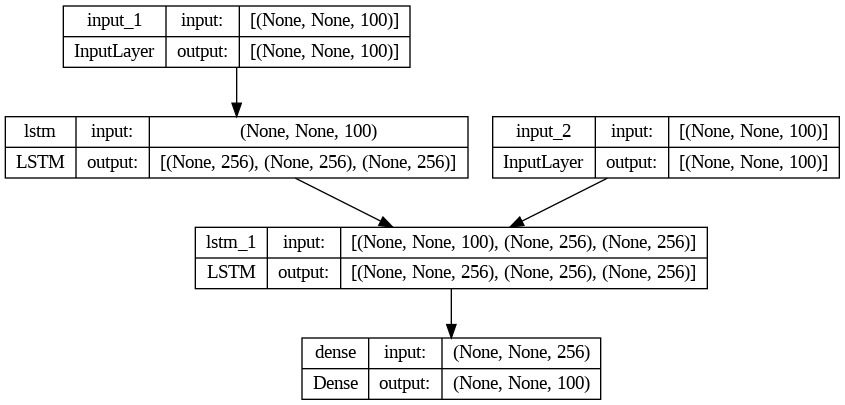

In [ ]:
plot_model(training_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)   # plot model

In [ ]:
print("Encoder input shape:", encoder_input_data.shape)
print("Decoder input shape:", decoder_input_data.shape)
print("Decoder target shape:", decoder_target_data.shape)


Encoder input shape: (329, 137, 1183)
Decoder input shape: (329, 657, 2641)
Decoder target shape: (329, 657, 2641)


In [ ]:
num_encoder_tokens = 1183  # Match the encoder input shape
num_decoder_tokens = 2641  # Match the decoder input shape

# Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_lstm = LSTM(dimensionality, return_state=True)
encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_inputs)
encoder_states = [state_hidden, state_cell]

# Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define model
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)



In [ ]:
print(encoder_input_data.shape)
print(decoder_input_data.shape)


(329, 137, 1183)
(329, 657, 2641)


In [ ]:

training_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'], sample_weight_mode='temporal')
history1 = training_model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
)

training_model.save('training_model.h5')

Epoch 1/500
27/27 [==============================] - 173s 6s/step - loss: 1.1145 - accuracy: 0.0349 - val_loss: 1.3996 - val_accuracy: 0.0119
Epoch 2/500
27/27 [==============================] - 158s 6s/step - loss: 0.9743 - accuracy: 0.0089 - val_loss: 1.3027 - val_accuracy: 0.0119
Epoch 3/500
27/27 [==============================] - 166s 6s/step - loss: 0.9550 - accuracy: 0.0089 - val_loss: 1.3090 - val_accuracy: 0.0119
Epoch 4/500
 6/27 [=====>........................] - ETA: 1:53 - loss: 1.0168 - accuracy: 0.0094

KeyboardInterrupt: 

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Predictions

In [ ]:
from keras.models import load_model
training_model = load_model('training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

In [ ]:
latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]

In [ ]:
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [ ]:
training_model = load_model('training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)

    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, num_decoder_tokens))

    #Setting the first token of target sequence with the start token
    target_seq[0, 0, target_features_dict['<START>']] = 1.

    #A variable to store our response word by word
    decoded_sentence = ''

    stop_condition = False
    while not stop_condition:
          #Predicting output tokens with probabilities and states
          output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)

          #Choosing the one with highest probability
          sampled_token_index = np.argmax(output_tokens[0, -1, :])
          sampled_token = reverse_target_features_dict[sampled_token_index]
          decoded_sentence += " " + sampled_token

          #Stop if hit max length or found the stop token
          if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

          #Update the target sequence
          target_seq = np.zeros((1, 1, num_decoder_tokens))
          target_seq[0, 0, sampled_token_index] = 1.

          #Update states
          states_value = [hidden_state, cell_state]
    return decoded_sentence

In [ ]:
class ChatBot:
  negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")

  #Method to start the conversation
  def start_chat(self):
    user_response = input("Hi, I'm a chatbot trained on random dialogs. AMA!\n")

    if user_response in self.negative_responses:
      print("Ok, have a great day!")
      return
    self.chat(user_response)

  #Method to handle the conversation
  def chat(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")

  #Method to convert user input into a matrix
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix

  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'')
    return chatbot_response

  #Method to check for exit commands
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("Ok, have a great day!")
        return True
    return False

chatbot = ChatBot()

## Demo

In [ ]:


chatbot.start_chat()